In [ ]:
from google.colab import drive
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
## Define transforms to apply on images
transform = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

## defining training and test data
train_data = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_data = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

print(train_data)
print(test_data)

\
## creating data loaders
batch_size = 4 ## set the batch size value 
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True, num_workers=2)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=False, num_workers=2)

## image labels in cifar 10
class_labels = classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
           )
Dataset CIFAR10
    Number of datapoints: 10000
    Root location: ./data
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
           )


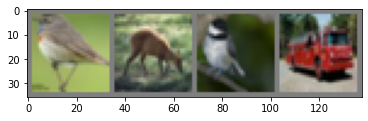

 bird  deer  bird truck


In [ ]:
# function to display images in the training set 
def display(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


## displaying images in 1 batch of the training set

# get 1 batch of training images
dataiter = iter(train_loader)
images, labels = dataiter.next()

# show images
display(torchvision.utils.make_grid(images[0:4]))
# print labels
print(' '.join('%5s' % class_labels[labels[j]] for j in range(4)))


In [ ]:
## Defining Classifier architecture 

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5, stride=1, padding=0)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, stride=1, padding=0)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

[1, 250] loss: 2.303
[1, 500] loss: 2.300
[1, 750] loss: 2.297
[1, 1000] loss: 2.286
[1, 1250] loss: 2.246
[1, 1500] loss: 2.156
[1, 1750] loss: 2.021
[1, 2000] loss: 1.949
[1, 2250] loss: 1.908
[1, 2500] loss: 1.848
[1, 2750] loss: 1.800
[1, 3000] loss: 1.771
[2, 250] loss: 1.695
[2, 500] loss: 1.656
[2, 750] loss: 1.616
[2, 1000] loss: 1.615
[2, 1250] loss: 1.607
[2, 1500] loss: 1.581
[2, 1750] loss: 1.555
[2, 2000] loss: 1.509
[2, 2250] loss: 1.517
[2, 2500] loss: 1.509
[2, 2750] loss: 1.530
[2, 3000] loss: 1.481
[3, 250] loss: 1.473
[3, 500] loss: 1.461
[3, 750] loss: 1.414
[3, 1000] loss: 1.451
[3, 1250] loss: 1.400
[3, 1500] loss: 1.416
[3, 1750] loss: 1.405
[3, 2000] loss: 1.420
[3, 2250] loss: 1.390
[3, 2500] loss: 1.371
[3, 2750] loss: 1.356
[3, 3000] loss: 1.348
Training Complete


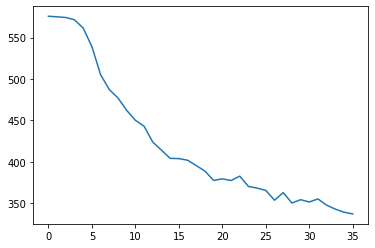

In [ ]:
## for reproducibility
torch.manual_seed(7)
np.random.seed(7)

## Instantiating classifier
net = Net()#.cuda()

## Defining optimizer and loss function
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)


## Defining Training Parameters

num_epochs = 3 # 2 for CPU training, 10 for GPU training
running_loss_list = [] # list to store running loss in the code below 
for epoch in range(num_epochs):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):

        inputs, labels = data
        #===============================================#
        optimizer.zero_grad()

        outputs = net(inputs)

        loss = criterion(outputs, labels)

        loss.backward()

        optimizer.step()
        #===============================================#
        # print statistics
        running_loss += loss.cpu().item()
        if i % 250 == 249:    # print every 250 mini-batches
            print('[{}, {}] loss: {:.3f}'.format(epoch + 1, i + 1, running_loss / 250))
            running_loss_list.append(running_loss)
            running_loss = 0.0
            
print('Training Complete')
PATH = './net.pth'
torch.save(net.state_dict(), PATH)

## complete the code to plot the running loss per 250 mini batches curve

def plot_loss_curve(running_loss_list):
  plt.plot(running_loss_list)
  plt.show()
  pass

plot_loss_curve(running_loss_list)

In [ ]:
## for reproducibility
torch.manual_seed(7)
np.random.seed(7)

## Instantiating classifier
net = Net().cuda()

## Defining optimizer and loss function
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)


## Defining Training Parameters

num_epochs = 20 # 2 for CPU training, 10 for GPU training
running_loss_list = [] # list to store running loss in the code below 
for epoch in range(num_epochs):  # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):

        inputs, labels = data
        #===============================================#

        inputs = inputs.cuda()
        labels = labels.cuda()

        optimizer.zero_grad()

        outputs = net(inputs)

        loss = criterion(outputs, labels)

        loss.backward()

        optimizer.step()
        #===============================================#
        # print statistics
        running_loss += loss.cpu().item()
        if i % 250 == 249:    # print every 250 mini-batches
            print('[{}, {}] loss: {:.3f}'.format(epoch + 1, i + 1, running_loss / 250))
            running_loss_list.append(running_loss)
            running_loss = 0.0
            
print('Training Complete')
PATH = './net.pth'
torch.save(net.state_dict(), PATH)



[1, 250] loss: 2.303
[1, 500] loss: 2.301
[1, 750] loss: 2.296
[1, 1000] loss: 2.291
[1, 1250] loss: 2.266
[1, 1500] loss: 2.213
[1, 1750] loss: 2.083
[1, 2000] loss: 2.025
[1, 2250] loss: 1.970
[1, 2500] loss: 1.961
[1, 2750] loss: 1.890
[1, 3000] loss: 1.800
[1, 3250] loss: 1.842
[1, 3500] loss: 1.770
[1, 3750] loss: 1.765
[1, 4000] loss: 1.699
[1, 4250] loss: 1.694
[1, 4500] loss: 1.711
[1, 4750] loss: 1.700
[1, 5000] loss: 1.694
[1, 5250] loss: 1.646
[1, 5500] loss: 1.642
[1, 5750] loss: 1.670
[1, 6000] loss: 1.630
[1, 6250] loss: 1.585
[1, 6500] loss: 1.559
[1, 6750] loss: 1.581
[1, 7000] loss: 1.529
[1, 7250] loss: 1.549
[1, 7500] loss: 1.561
[1, 7750] loss: 1.553
[1, 8000] loss: 1.551
[1, 8250] loss: 1.487
[1, 8500] loss: 1.519
[1, 8750] loss: 1.535
[1, 9000] loss: 1.529
[1, 9250] loss: 1.515
[1, 9500] loss: 1.486
[1, 9750] loss: 1.536
[1, 10000] loss: 1.483
[1, 10250] loss: 1.412
[1, 10500] loss: 1.513
[1, 10750] loss: 1.456
[1, 11000] loss: 1.447
[1, 11250] loss: 1.484
[1, 115

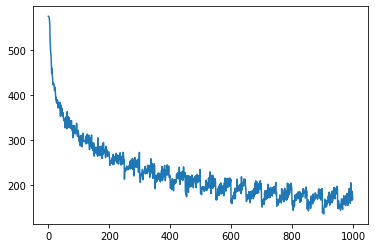

In [ ]:
plot_loss_curve(running_loss_list)

### Testing the network

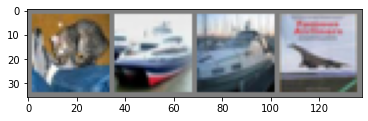

GroundTruth:    cat  ship  ship plane
Predicted:    cat  ship   car  ship


In [ ]:
## displaying images from test set 
dataiter = iter(test_loader)
images, labels = dataiter.next()

# print images
display(torchvision.utils.make_grid(images[0:4]))
print('GroundTruth: ', ' '.join('%5s' % class_labels[labels[j]] for j in range(4)))

## Instantiating network and loading the trained model
net = Net()
net.load_state_dict(torch.load(PATH))

## Getting predicted label/class from the model output 
outputs = net(images)
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % class_labels[predicted[j]] for j in range(4)))

In [ ]:
### Accuracy on whole data set
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
acc  = (correct/total) * 100 ## stores the accuracy computed in the above loop 
print('Accuracy of the network on the 10000 test images: %d %%' % (acc))

Accuracy of the network on the 10000 test images: 50 %


In [ ]:
def train(num_epochs=2, train_loader=train_loader, use_gpu=True, lr=0.001, momentum=0.9, model_save_path='./net.pth'):
  """
  INPUTS 
  num_epochs: number of training epochs
  use_gpu: False by default. If true, load the model and data to GPU for training
  lr: learning rate for SGD optimizer
  momentum: momentum for SGD optimizer
  model_save_path: save path for the trained model 

  OUTPUTS
  returns running_loss_list: which stores the loss averaged over a minibatch of size 250
  """

  ## for reproducibility
  torch.manual_seed(7)
  np.random.seed(7)

  ## Instantiating classifier
  if(use_gpu):
    net = Net().cuda()
  else: 
    net = Net()

  ## Defining optimizer and loss function
  criterion = nn.CrossEntropyLoss()
  optimizer = optim.SGD(net.parameters(), lr=lr, momentum=momentum)


  ## Defining Training Parameters

  running_loss_list = [] # list to store running loss in the code below 
  for epoch in range(num_epochs):  # loop over the dataset multiple times
      running_loss = 0.0
      for i, data in enumerate(train_loader, 0):

          inputs, labels = data
          #===============================================# 

          if(use_gpu):
              inputs = inputs.cuda()
              labels = labels.cuda()
          
          optimizer.zero_grad()

          outputs = net(inputs)

          loss = criterion(outputs, labels)

          loss.backward()

          optimizer.step()
          #===============================================#
          # print statistics
          running_loss += loss.cpu().item()
          if i % 250 == 249:    # print every 250 mini-batches
              print('[{}, {}] loss: {:.3f}'.format(epoch + 1, i + 1, running_loss / 250))
              running_loss_list.append(running_loss)
              running_loss = 0.0
              
  print('Training Complete')

  torch.save(net.state_dict(), model_save_path)

  return running_loss_list

def test(test_loader=test_loader, model_path='./net.pth'):
  ### Accuracy on whole data set
  net.load_state_dict(torch.load(PATH))
  correct = 0
  total = 0
  with torch.no_grad():
      for data in test_loader:
          images, labels = data
          outputs = net(images)
          _, predicted = torch.max(outputs.data, 1)
          total += labels.size(0)
          correct += (predicted == labels).sum().item()

  acc  = (correct/total) * 100 ## stores the accuracy computed in the above loop 
  print('Accuracy of the network on the 10000 test images: %d %%' % (acc))


[1, 250] loss: 2.303
[1, 500] loss: 2.301
[1, 750] loss: 2.296
[1, 1000] loss: 2.292
[1, 1250] loss: 2.267
[1, 1500] loss: 2.215
[1, 1750] loss: 2.086
[1, 2000] loss: 2.025
[1, 2250] loss: 1.969
[1, 2500] loss: 1.961
[1, 2750] loss: 1.890
[1, 3000] loss: 1.798
[1, 3250] loss: 1.841
[1, 3500] loss: 1.773
[1, 3750] loss: 1.768
[1, 4000] loss: 1.700
[1, 4250] loss: 1.694
[1, 4500] loss: 1.713
[1, 4750] loss: 1.701
[1, 5000] loss: 1.698
[1, 5250] loss: 1.646
[1, 5500] loss: 1.643
[1, 5750] loss: 1.667
[1, 6000] loss: 1.626
[1, 6250] loss: 1.591
[1, 6500] loss: 1.552
[1, 6750] loss: 1.580
[1, 7000] loss: 1.522
[1, 7250] loss: 1.550
[1, 7500] loss: 1.559
[1, 7750] loss: 1.550
[1, 8000] loss: 1.551
[1, 8250] loss: 1.486
[1, 8500] loss: 1.514
[1, 8750] loss: 1.532
[1, 9000] loss: 1.533
[1, 9250] loss: 1.506
[1, 9500] loss: 1.487
[1, 9750] loss: 1.537
[1, 10000] loss: 1.485
[1, 10250] loss: 1.407
[1, 10500] loss: 1.519
[1, 10750] loss: 1.446
[1, 11000] loss: 1.460
[1, 11250] loss: 1.480
[1, 115

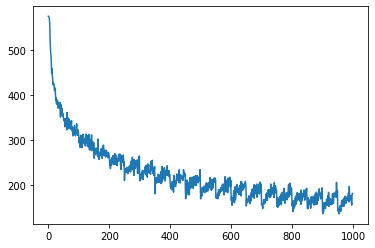

Accuracy of the network on the 10000 test images: 60 %


In [ ]:
torch.manual_seed(7)
np.random.seed(7)

num_epochs = 20
batch_size = 4
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True, num_workers=2)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=False, num_workers=2)

running_loss_list = train(num_epochs=num_epochs, train_loader=train_loader, use_gpu=True, lr=0.001, momentum=0.9, model_save_path='./net.pth')
plot_loss_curve(running_loss_list)

test(test_loader = test_loader)